# Feature correlation

Correlation between main weapon used and various "features" of the round on different maps

In [1]:
from s2_analytics.collector.object_collector import GameObjectCollector
import seaborn as sns

from s2_analytics.constants import WEAPONS_PRIMARY, WEAPONS_SECONDARY, WEAPON_MODS_DATES
from s2_analytics.importer import JsonGameReader
from s2_analytics.main_weapon_analyzer import MainWeaponRoundTagger
from s2_analytics.team_round_tag_correlation_analyzer import TeamRoundTagCorrelationAnalyzer

tag_correlation_analyzer = TeamRoundTagCorrelationAnalyzer([MainWeaponRoundTagger([WEAPONS_PRIMARY, WEAPONS_SECONDARY])])
game_collector = GameObjectCollector()
processors = [tag_correlation_analyzer, game_collector]
JsonGameReader(processors, game_filter=lambda game: game.match_quality >= 0.5).read_games("logs_ranked/", start_date=WEAPON_MODS_DATES[0])
pass

## Data summary

In [2]:
# todo

In [3]:
# todo

## Feature correlation

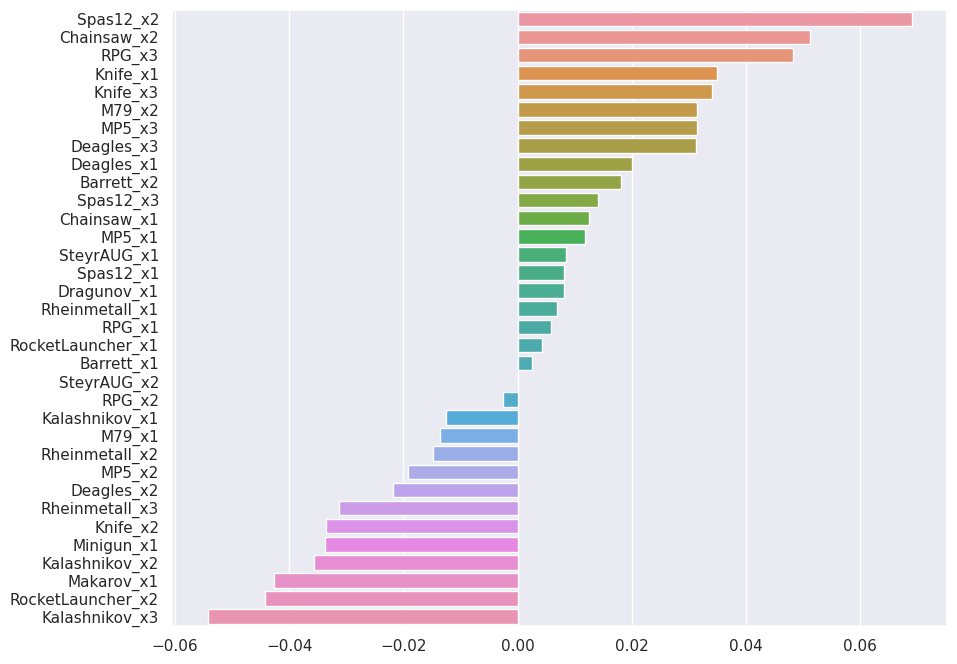

In [4]:
keys = []
values = []
correlation = tag_correlation_analyzer.calculate_win_correlation()
for key, value in sorted(correlation.items(), key=lambda a: a[1], reverse=True):
    keys.append(key)
    values.append(value)

sns.set(rc={'figure.figsize': (10, 8)})
sns.barplot(x=values, y=keys)
pass